In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("cereal.csv")

In [ ]:
df.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,FDA_25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,FDA_0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,FDA_25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,FDA_25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,FDA_25,3,1.0,0.75,34.384843


In [ ]:
# Content
# Fields in the dataset:

# Name: Name of cereal
# mfr: Manufacturer of cereal
# A = American Home Food Products;
# G = General Mills
# K = Kelloggs
# N = Nabisco
# P = Post
# Q = Quaker Oats
# R = Ralston Purina
# type:
# cold
# hot
# calories: calories per serving
# protein: grams of protein
# fat: grams of fat
# sodium: milligrams of sodium
# fiber: grams of dietary fiber
# carbo: grams of complex carbohydrates
# sugars: grams of sugars
# potass: milligrams of potassium
# vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
# shelf: display shelf (1, 2, or 3, counting from the floor)
# weight: weight in ounces of one serving
# cups: number of cups in one serving
# rating: a rating of the cereals (Possibly from Consumer Reports?)

In [ ]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     object 
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(5), object(4)
memory usage: 9.8+ KB


In [ ]:
df.shape

(77, 16)

##**Memprediksi rating sereal**

### Lihat Null

In [ ]:
#Melihat data yang hilang
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [ ]:
missing_percentage(df)

,Total,Percent
potass,2,2.6
carbo,1,1.3
sugars,1,1.3
name,0,0.0
mfr,0,0.0
type,0,0.0
calories,0,0.0
protein,0,0.0
fat,0,0.0
sodium,0,0.0


In [ ]:
# Menghapus Null
df=df.dropna()

In [ ]:
# 0   name      77 non-null     object 
#  1   mfr       77 non-null     object 
#  2   type      77 non-null     object 
#  3   calories  77 non-null     int64  
#  4   protein   77 non-null     int64  
#  5   fat       77 non-null     int64  
#  6   sodium    77 non-null     int64  
#  7   fiber     77 non-null     float64
#  8   carbo     76 non-null     float64
#  9   sugars    76 non-null     float64
#  10  potass    75 non-null     float64
#  11  vitamins  77 non-null     object 
#  12  shelf     77 non-null     int64  
#  13  weight    77 non-null     float64
#  14  cups      77 non-null     float64
#  15  rating    77 non-null     float64

### 1. Liat Distribusi Ratingnya

<ipython-input-19-61cccc9bc5f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["rating"])


Text(0.5, 1.0, 'Distribusi Rating Sereal')

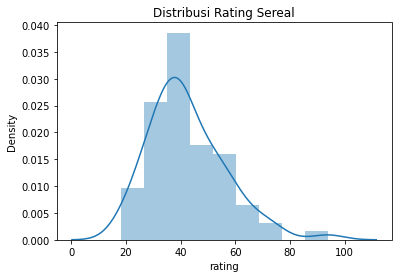

In [ ]:
sns.distplot(df["rating"])
plt.title("Distribusi Rating Sereal")

Kebanyakan sereal mempunyai rating ~40

Distribusi ratingnya normal, ...

### 2. Boxplot

Text(0.5, 1.0, 'Distribusi Rating Sereal')

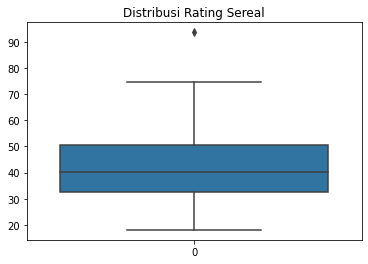

In [ ]:
sns.boxplot(df["rating"])
plt.title("Distribusi Rating Sereal")

Kebanyakan sereal mempunyai rating ~40, ada outlier yaitu pada sereal dengan rating > 90. Kita akan menghapus data tersebut

In [ ]:
df=df[df["rating"]<90]

Text(0.5, 1.0, 'Distribusi Rating Sereal')

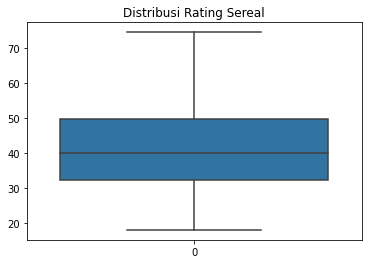

In [ ]:
sns.boxplot(df["rating"])
plt.title("Distribusi Rating Sereal")

### 3. Scatterplot

Text(0.5, 0, 'Sugars')

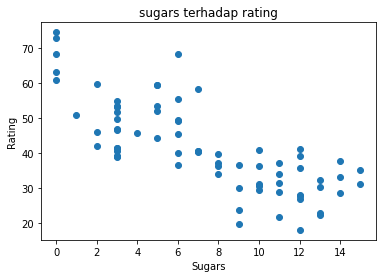

In [ ]:
#Numerik-Numerik
x = df["sugars"]
y = df["rating"]
plt.scatter(x,y)
plt.title("sugars terhadap rating")
plt.ylabel("Rating")
plt.xlabel("Sugars")

Semakin tinggi nilai sugarsnya semakin rendah nilai ratingnya. Sugars dan rating mempunyai hubungan berbanding terbalik. Mungkin sereal-sereal yang mempunyai kadar gula tinggi ngga disukain sama orang blabla

### 4. Barplot (kategorik vs numerik)



In [ ]:
# Aggregate (mean)

In [ ]:
rat_mfr = df.groupby("mfr")["rating"].mean().reset_index()
rat_mfr

,mfr,rating
0,A,54.850917
1,G,34.485852
2,K,41.780896
3,N,68.655517
4,P,41.705744
5,Q,41.785647
6,R,42.565591


Text(0.5, 1.0, 'mfr terhadap rating')

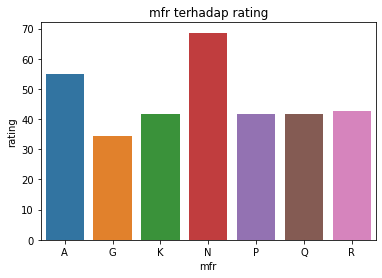

In [ ]:
sns.barplot(x="mfr",y="rating",data=rat_mfr)
plt.title("mfr terhadap rating")

manufaktur N merupakan manufaktur yang mempunyai rating paling tinggi, manufaktur G lebih rendah. Manufaktur G harus memperbaiki produknya agar bisa bersaing dengan sereal yang lain.

<Axes: xlabel='mfr', ylabel='rating'>

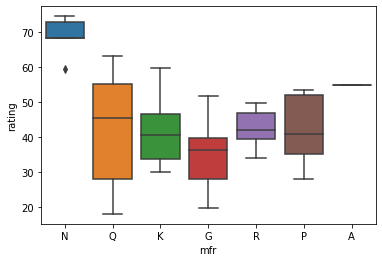

In [ ]:
# Boxplot grouped by categorical variabel
sns.boxplot(x="mfr", y="rating",data=df)

In [ ]:
rat_mfr_vit = df.groupby(["mfr","vitamins"])["rating"].mean().reset_index()
rat_mfr_vit

,mfr,vitamins,rating
0,A,FDA_25,54.850917
1,G,FDA_100,38.030458
2,G,FDA_25,33.926177
3,K,FDA_100,38.166245
4,K,FDA_25,42.351631
5,N,FDA_0,71.836874
6,N,FDA_25,63.883483
7,P,FDA_25,41.705744
8,Q,FDA_0,52.581812
9,Q,FDA_25,33.688523


Text(0.5, 1.0, 'mfr terhadap rating')

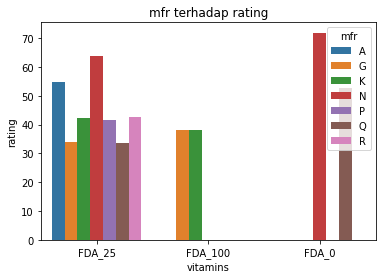

In [ ]:
sns.barplot(x="vitamins",y="rating",data=rat_mfr_vit,hue="mfr")
plt.title("mfr terhadap rating")

vitamin FDA_0 pada produksi N merupakan produk dengan rating tertinggi.

ngga semua manufaktur memproduksi sereal dengan vitamin kadar 100 dan 0

##3. Korelasi (HeatMap)

In [ ]:
cat = ["mfr","type","vitamins"]

In [ ]:
for x in cat :
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    df[x] = labelencoder.fit_transform(df[x])

In [ ]:
df=df.drop(columns="name")

<ipython-input-42-cade805ead56>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


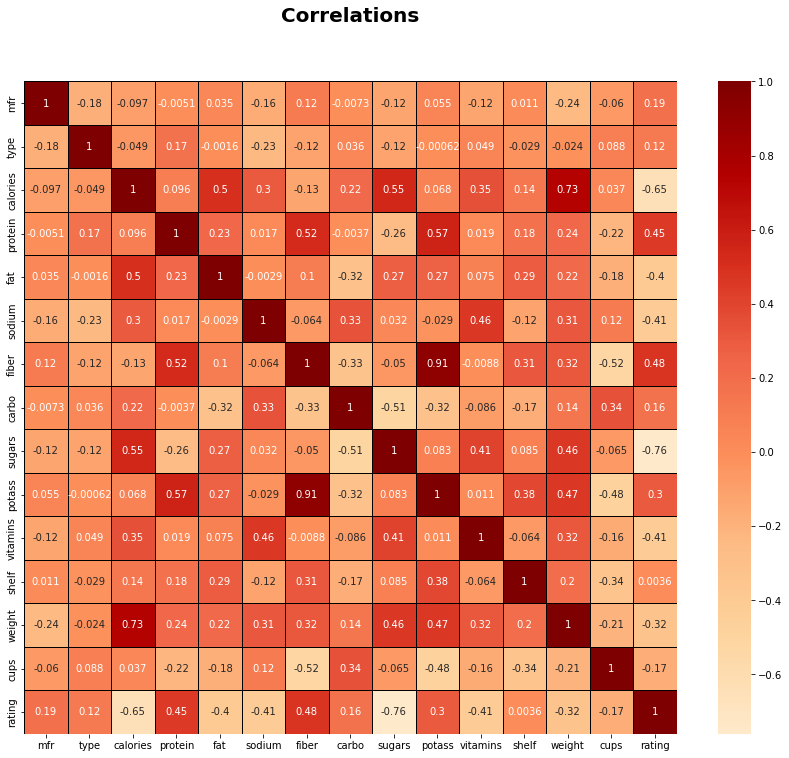

In [ ]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
## in order to reverse the bar replace "RdBu" with "RdBu_r"
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), annot=True,mask = False,cmap = 'OrRd', linewidths=.7, linecolor='black',fmt='.2g',center = 0,square=True)

plt.title("Correlations", y = 1.03,fontsize = 20, fontweight = 'bold', pad = 40);

Variabel yang mempunyai korelasi terbesar dengan rating adalah sugars. Namun mempunyai nilai korelasi yang negatif. Semakin tinggi kadar gulanya semakin rendah ratingnya. 

fiber vs pottas

yang paling rendah korelasi dengan variabel rating adalah shelf. actionnya kita bakal apus variabel itu dll